# Noising Experiments
In this notebook i will:
1. Insert noise (with different parameters, if applicable) in a default image (colored noise k = 6)
2. Extract the metrics of the noised images with different parameters
3. Generate the curve that represents the noise used
4. Insert noise on images of the dataset and see if it gets near the curve generated at step 3

## Salt and Pepper

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
import utils.utils as utils_functions
import utils.noise_generator as noise_gen
from utils.images_generator import salt_and_pepper_noise, salt_and_pepper_noise_v2, normalize_img_to_0_255, generate_histogram, colored_noise, uniform_image
from utils.experiments_functions import get_img_info
from skimage import data
from skimage.color import rgb2gray

### Default Image

Generating default image

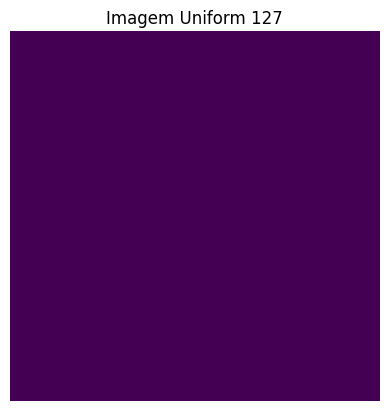

(122, 122)


In [19]:
# generates the default image (uniform)
gs_image = uniform_image(127, (122, 122))
plt.imshow(gs_image)
plt.title(f"Imagem Uniform 127")
plt.axis('off')  # Remove os eixos
plt.show()
print(gs_image.shape)

In [18]:
print(gs_image)

[[300 300 300 ... 300 300 300]
 [300 300 300 ... 300 300 300]
 [300 300 300 ... 300 300 300]
 ...
 [300 300 300 ... 300 300 300]
 [300 300 300 ... 300 300 300]
 [300 300 300 ... 300 300 300]]


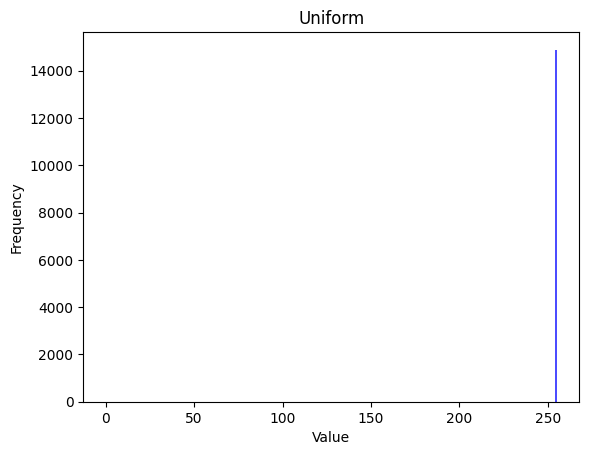

In [9]:
generate_histogram(gs_image, isNormalized=True, title=f'Uniform')

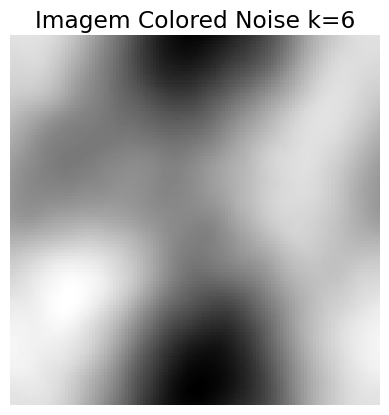

(122, 122)


In [197]:
# generates the default image (colored noise k=6)
gs_image = colored_noise(6, (122, 122))
# normalize to 0-255
gs_image = normalize_img_to_0_255(gs_image)
plt.imshow(gs_image, cmap='gray')
plt.title(f"Imagem Colored Noise k=6")
plt.axis('off')  # Remove os eixos
plt.show()
print(gs_image.shape)

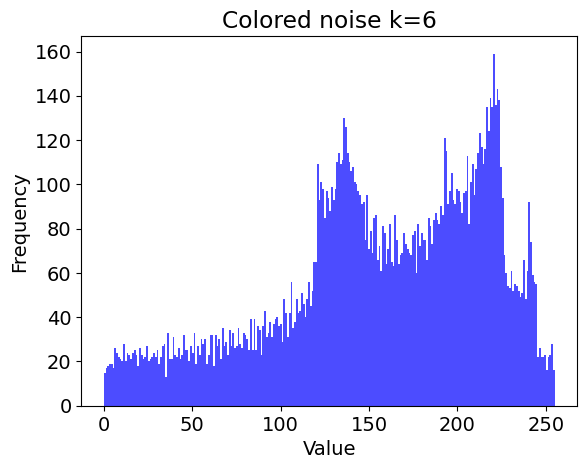

In [198]:
generate_histogram(gs_image, isNormalized=True, title=f'Colored noise k=6')

Generating the noised images

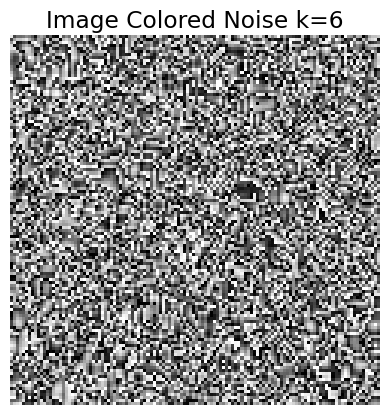

(122, 122)


In [199]:
noised_image = salt_and_pepper_noise(0.04, 0.04, gs_image)
plt.imshow(noised_image, cmap='gray')
plt.title(f"Image Colored Noise k=6")
plt.axis('off')
plt.show()
print(noised_image.shape)

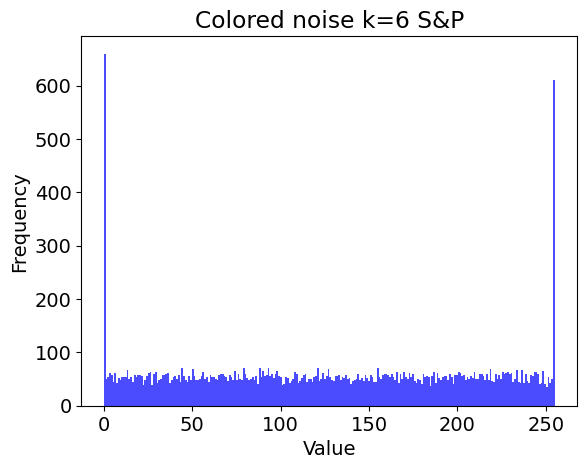

In [200]:
generate_histogram(noised_image, isNormalized=True, title=f'Colored noise k=6 S&P')

In [25]:
# sets the default images 
default_images = {
    'colored_k6':normalize_img_to_0_255(colored_noise(6, (122, 122))),
    'uniform 127':uniform_image(127, (122, 122))
}
# sets the probabilities used
probabilities_sp = [0.05, 0.1, 0.2, 0.3, 0.4]
probabilities_sp = np.linspace(0.05, 0.49, 20)
probabilities_sp = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
q_linspace = np.linspace(-2, 20, num = 23)
q_linspace = [0]
# stores all the metrics of each image in a list
image_data_list = []
for gs_image_name in default_images:
    gs_image = default_images[gs_image_name]
    for prob in probabilities_sp:
        print(f"Probability = {prob}")
        # generate noise image
        print("Generating noised image")
        noised_image = salt_and_pepper_noise_v2(prob, prob, gs_image)
        # extract metrics
        print("Extracting data")
        noised_image_data = get_img_info(noised_image, q_linspace = q_linspace)
        # add the information
        noised_image_data['image_name'] = gs_image_name
        noised_image_data['noise_prob'] = prob
        image_data_list.append(noised_image_data)

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


Probability = 0
Generating noised image
Extracting data
Probability = 0.05
Generating noised image
Extracting data
Probability = 0.1
Generating noised image
Extracting data
Probability = 0.15
Generating noised image
Extracting data
Probability = 0.2
Generating noised image
Extracting data
Probability = 0.25
Generating noised image
Extracting data
Probability = 0.3
Generating noised image
Extracting data
Probability = 0.35
Generating noised image
Extracting data
Probability = 0.4
Generating noised image
Extracting data
Probability = 0.45
Generating noised image
Extracting data
Probability = 0.5
Generating noised image
Extracting data
Probability = 0
Generating noised image
Extracting data
Probability = 0.05
Generating noised image
Extracting data
Probability = 0.1
Generating noised image
Extracting data
Probability = 0.15
Generating noised image
Extracting data
Probability = 0.2
Generating noised image
Extracting data
Probability = 0.25
Generating noised image
Extracting data
Probabilit

In [27]:
# This v2, means the use of the salt_and_pepper_noise_v2() to add noise
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux.to_csv(f"results/noise_analysis/sp/sp_analysis_default_v2.csv", index = False)

### Dataset Images
1. Take 1 image from each of the 25 classes of the Sintorn Dataset
2. Insert noise with different probabilities
3. extract metrics and insert in the previous dataframe

In [2]:
# reads 1 image from each class
images_path = f'data/Sintorn/hardware'
rot = 'r000'
seg = 's001'
images_filenames = []
for file in os.listdir(images_path):
    if file.endswith(f"{rot}-{seg}.png"):
        images_filenames.append(file)
print(len(images_filenames))

25


Testing histogram

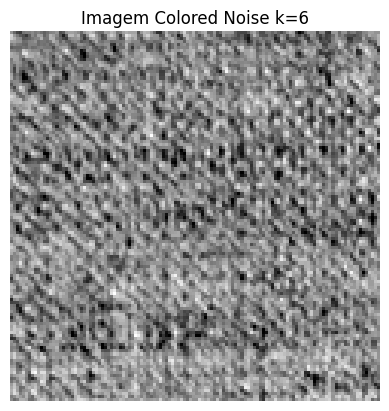

(122, 122)


In [3]:
img_filename = images_filenames[1]
gs_image = cv2.imread(f'{images_path}/{img_filename}', cv2.IMREAD_GRAYSCALE)
plt.imshow(gs_image, cmap='gray')
plt.title(f"Imagem Colored Noise k=6")
plt.axis('off')  # Remove os eixos
plt.show()
print(gs_image.shape)

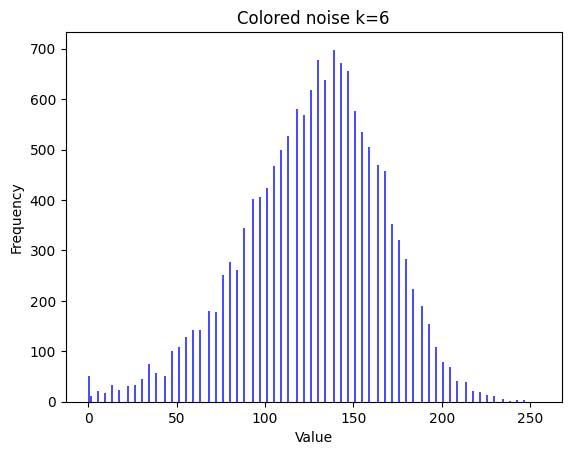

In [4]:
generate_histogram(gs_image, isNormalized=True, title=f'Colored noise k=6')

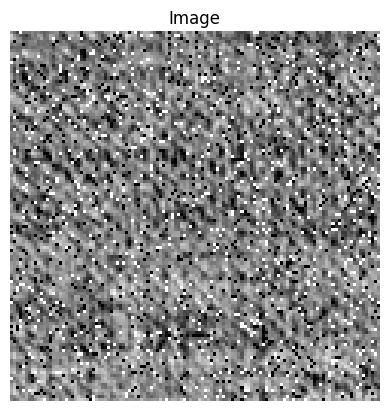

(122, 122)


In [9]:
noised_image = salt_and_pepper_noise_v2(0.05, 0.05, gs_image)
plt.imshow(noised_image, cmap='gray')
plt.title(f"Image")
plt.axis('off')
plt.show()
print(noised_image.shape)

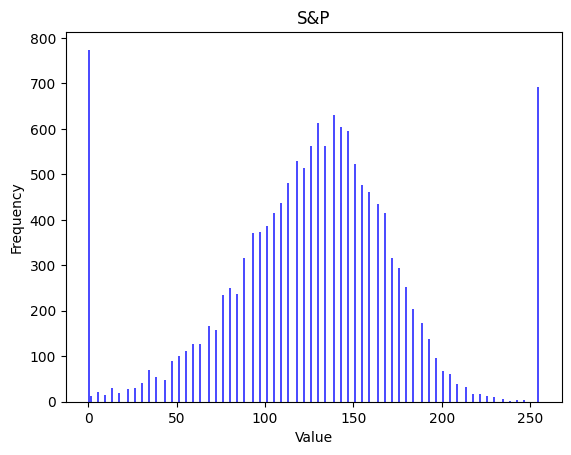

In [68]:
generate_histogram(noised_image, isNormalized=True, title=f'S&P')

Extracting metrics for each image with each parameter

In [13]:
# sets the probabilities used
probabilities_sp = [0.05, 0.1, 0.2, 0.3, 0.4]
probabilities_sp = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
q_linspace = np.linspace(-2, 20, num = 23)
q_linspace = [0]
image_data_list = []
for idx, img_filename in enumerate(images_filenames):
    # reads the image
    gs_image = cv2.imread(f'{images_path}/{img_filename}', cv2.IMREAD_GRAYSCALE)
    image_title = img_filename.split('.')[0]
    print(image_title, f"{idx+1}/{len(images_filenames)}")
    # adds noise
    for prob in probabilities_sp:
        print(f"\tProbability = {prob}")
        # generate noise image
        print("\tGenerating noised image")
        noised_image = salt_and_pepper_noise_v2(prob, prob, gs_image)
        # extract metrics
        print("\tExtracting data")
        noised_image_data = get_img_info(noised_image, q_linspace = q_linspace)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_prob'] = prob
        image_data_list.append(noised_image_data)

canesugar01-r000-s001 1/25
	Probability = 0
	Generating noised image
	Extracting data
	Probability = 0.05
	Generating noised image
	Extracting data
	Probability = 0.1
	Generating noised image
	Extracting data
	Probability = 0.15
	Generating noised image
	Extracting data
	Probability = 0.2
	Generating noised image
	Extracting data
	Probability = 0.25
	Generating noised image
	Extracting data
	Probability = 0.3
	Generating noised image
	Extracting data
	Probability = 0.35
	Generating noised image
	Extracting data
	Probability = 0.4
	Generating noised image
	Extracting data
	Probability = 0.45
	Generating noised image
	Extracting data
	Probability = 0.5
	Generating noised image
	Extracting data
canvas01-r000-s001 2/25
	Probability = 0
	Generating noised image
	Extracting data
	Probability = 0.05
	Generating noised image
	Extracting data
	Probability = 0.1
	Generating noised image
	Extracting data
	Probability = 0.15
	Generating noised image
	Extracting data
	Probability = 0.2
	Generating 

In [70]:
data_ss = pd.concat(image_data_list, ignore_index=True)
data_ss.to_csv(f"results/noise_analysis/sp_analysis.csv", index = False)

In [14]:
# This v2, means the use of the salt_and_pepper_noise_v2() to add noise
data_ss = pd.concat(image_data_list, ignore_index=True)
data_ss.to_csv(f"results/noise_analysis/sp/sp_analysis_sintorn_v2.csv", index = False)

### SKIMAGE

float64
MIN 0.00392156862745098 MAX 0.9882352941176471


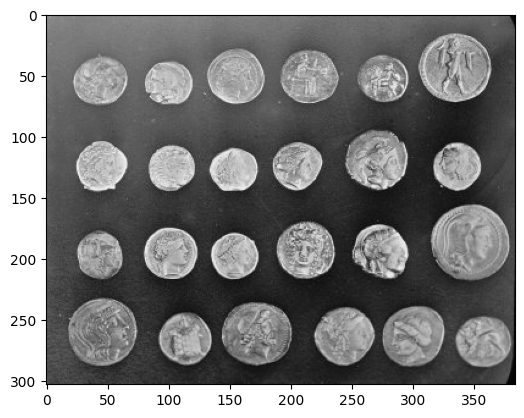

In [3]:
astronaut_image = data.astronaut()
astronaut_image = (rgb2gray(astronaut_image)*255).astype(np.uint8)
astronaut_image = data.coins()
astronaut_image_float = utils_functions.normalize_uint8_to_float64(data.coins())
plt.imshow(astronaut_image_float, cmap='gray')
print(astronaut_image_float.dtype)
print("MIN", astronaut_image_float.min(), "MAX", astronaut_image_float.max())

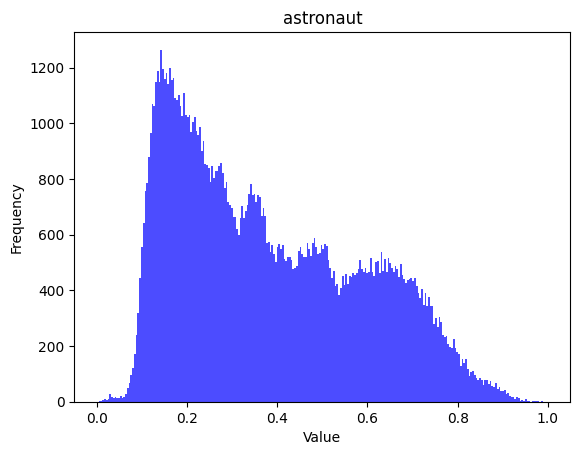

In [5]:
generate_histogram(astronaut_image_float, isNormalized=True, title=f'astronaut', range=(0,1))

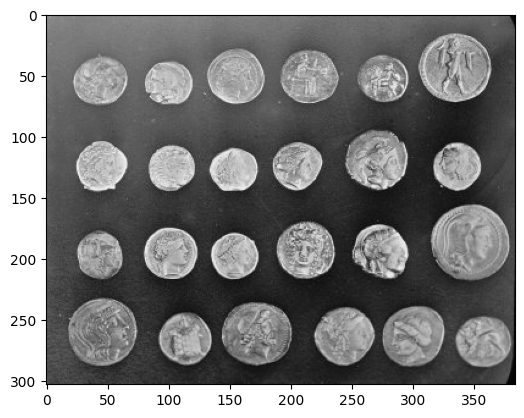

In [17]:
prob = 0
noised_image = noise_gen.add_sp_noise(astronaut_image_float, prob, prob)
plt.imshow(noised_image, cmap='gray')

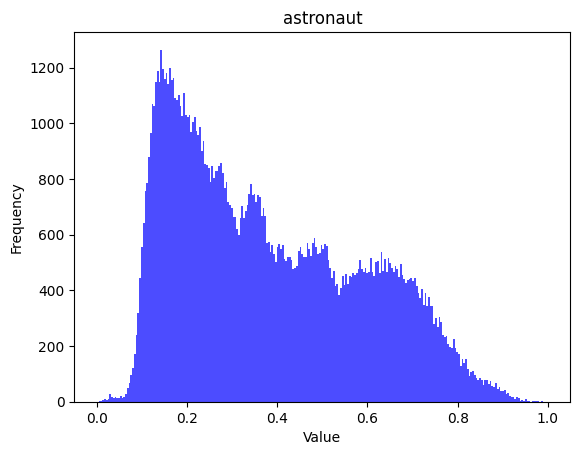

In [18]:
generate_histogram(noised_image, isNormalized=True, title=f'astronaut', range=(0,1))

In [15]:
from skimage import data
from skimage.color import rgb2gray

# images need to be in range (0,1) and dtype float64
skimage_images = {
    'data.astronaut': rgb2gray(data.astronaut()),
    'data.cat': rgb2gray(data.cat()),
    'data.coins': utils_functions.normalize_uint8_to_float64(data.coins())
}

In [19]:
# sets the probabilities used
probabilities_sp = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
probabilities_sp = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
image_data_list = []
for idx, skimage_name in enumerate(skimage_images):
    # reads the image
    gs_image = skimage_images[skimage_name]
    image_title = skimage_name.split('.')[1]
    print(image_title, f"{idx+1}/{len(skimage_images)}")
    # adds noise
    for prob in probabilities_sp:
        print(f"\tProbability = {prob}")
        # generate noise image
        print("\tGenerating noised image")
        noised_image = noise_gen.add_sp_noise(gs_image, prob, prob)
        # extract metrics
        print("\tExtracting data")
        noised_image_data = get_img_info(noised_image, q_linspace = [0])
        # add the information
        noised_image_data['image_name'] = skimage_name
        noised_image_data['noise_prob'] = prob
        image_data_list.append(noised_image_data)

astronaut 1/3
	Probability = 0
	Generating noised image
	Extracting data
	Probability = 0.05
	Generating noised image
	Extracting data
	Probability = 0.1
	Generating noised image
	Extracting data
	Probability = 0.15
	Generating noised image
	Extracting data
	Probability = 0.2
	Generating noised image
	Extracting data
	Probability = 0.25
	Generating noised image
	Extracting data
	Probability = 0.3
	Generating noised image
	Extracting data
	Probability = 0.35
	Generating noised image
	Extracting data
	Probability = 0.4
	Generating noised image
	Extracting data
	Probability = 0.45
	Generating noised image
	Extracting data
	Probability = 0.5
	Generating noised image
	Extracting data
cat 2/3
	Probability = 0
	Generating noised image
	Extracting data
	Probability = 0.05
	Generating noised image
	Extracting data
	Probability = 0.1
	Generating noised image
	Extracting data
	Probability = 0.15
	Generating noised image
	Extracting data
	Probability = 0.2
	Generating noised image
	Extracting data

In [20]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_prob
0,0,0.226687,0.149256,0.942420,0.066415,0.560020,0.294618,0.145362,data.astronaut,0.00
1,0,0.147333,0.134769,0.966048,0.039202,0.480666,0.327051,0.192283,data.astronaut,0.05
2,0,0.090401,0.117398,0.977151,0.026448,0.423735,0.346832,0.229434,data.astronaut,0.10
3,0,0.057826,0.091624,0.978424,0.025129,0.391160,0.350232,0.258608,data.astronaut,0.15
4,0,0.036354,0.071836,0.972915,0.032548,0.369687,0.351075,0.279238,data.astronaut,0.20
5,0,0.030651,0.059884,0.959946,0.048760,0.363985,0.347950,0.288066,data.astronaut,0.25
6,0,0.030992,0.041291,0.938996,0.074531,0.364325,0.338483,0.297192,data.astronaut,0.30
7,0,0.045009,0.034796,0.908179,0.110064,0.378342,0.328227,0.293431,data.astronaut,0.35
8,0,0.069993,0.027497,0.865793,0.155207,0.403326,0.312085,0.284588,data.astronaut,0.40
9,0,0.111066,0.016157,0.805660,0.211080,0.444399,0.285879,0.269722,data.astronaut,0.45


In [21]:
# This v2, means the use of the salt_and_pepper_noise_v2() to add noise
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux.to_csv(f"results/noise_analysis/sp/sp_analysis_skimage_noisegen.csv", index = False)

Saving images

In [22]:
# sets the probabilities used
probabilities_sp = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
probabilities_sp = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
image_data_list = []
results_image_path = "results/noise_analysis/q0/sp/images/testv2"
for idx, skimage_name in enumerate(skimage_images):
    # reads the image
    gs_image = skimage_images[skimage_name]
    image_title = skimage_name.split('.')[1]
    print(image_title, f"{idx+1}/{len(skimage_images)}")
    # adds noise
    for prob in probabilities_sp:
        print(f"\tProbability = {prob}")
        # generate noise image
        print("\tGenerating noised image")
        noised_image = salt_and_pepper_noise_v2(prob, prob, gs_image)
        # saving
        im = Image.fromarray(noised_image)
        im = im.convert('RGB')
        im.save(f"{results_image_path}/{image_title}-prob-{prob}.png")

astronaut 1/3
	Probability = 0
	Generating noised image
	Probability = 0.05
	Generating noised image
	Probability = 0.1
	Generating noised image
	Probability = 0.15
	Generating noised image
	Probability = 0.2
	Generating noised image
	Probability = 0.25
	Generating noised image
	Probability = 0.3
	Generating noised image
	Probability = 0.35
	Generating noised image
	Probability = 0.4
	Generating noised image
	Probability = 0.45
	Generating noised image
	Probability = 0.5
	Generating noised image
cat 2/3
	Probability = 0
	Generating noised image
	Probability = 0.05
	Generating noised image
	Probability = 0.1
	Generating noised image
	Probability = 0.15
	Generating noised image
	Probability = 0.2
	Generating noised image
	Probability = 0.25
	Generating noised image
	Probability = 0.3
	Generating noised image
	Probability = 0.35
	Generating noised image
	Probability = 0.4
	Generating noised image
	Probability = 0.45
	Generating noised image
	Probability = 0.5
	Generating noised image
coin

Testing the entropy for the same image and more probabilities

In [26]:
skimage_images = {
    'data.astronaut': (rgb2gray(data.astronaut())*255).astype(np.uint8),
    'data.cat': (rgb2gray(data.cat())*255).astype(np.uint8),
    'data.coins': data.coins()
}

# sets the probabilities used
probabilities_sp = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
probabilities_sp = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
probabilities_sp = np.linspace(0, 0.5, num = 23)
print(probabilities_sp)
image_data_list = []
results_image_path = "results/noise_analysis/q0/sp/entropy/"
for idx, skimage_name in enumerate(skimage_images):
    # reads the image
    gs_image = skimage_images[skimage_name]
    image_title = skimage_name.split('.')[1]
    print(image_title, f"{idx+1}/{len(skimage_images)}")
    # adds noise
    for prob in probabilities_sp:
        prob_text = f"{prob * 100:.2f}"
        print(f"\tProbability = {prob}")
        # generate noise image
        print("\tGenerating noised image")
        noised_image = salt_and_pepper_noise_v2(prob, prob, gs_image)
        print("\tExtracting data")
        noised_image_data = get_img_info(noised_image, q_linspace = [0])
        entropy = noised_image_data['Weighted Entropy Correct'].iloc[0]
        # saving
        im = Image.fromarray(noised_image)
        im = im.convert('RGB')
        im.save(f"{results_image_path}/{image_title}/{image_title}-{prob_text}-img.png")
        # histogram
        flattened_img = noised_image.flatten()
        plt.hist(flattened_img, bins=256, range=(0, 255), color='blue', alpha=0.7)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title(f"{image_title} s&p {prob_text}%")
        plt.savefig(f'{results_image_path}/{image_title}/{image_title}-{prob_text}-hist-ent-{entropy}.png', bbox_inches='tight')
        plt.close()
        # add the information
        noised_image_data['image_name'] = skimage_name
        noised_image_data['noise_prob'] = prob
        image_data_list.append(noised_image_data)
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux.to_csv(f"{results_image_path}/sp_analysis_skimage_entropy.csv", index = False)

[0.         0.02272727 0.04545455 0.06818182 0.09090909 0.11363636
 0.13636364 0.15909091 0.18181818 0.20454545 0.22727273 0.25
 0.27272727 0.29545455 0.31818182 0.34090909 0.36363636 0.38636364
 0.40909091 0.43181818 0.45454545 0.47727273 0.5       ]
astronaut 1/3
	Probability = 0.0
	Generating noised image
	Extracting data
	Probability = 0.022727272727272728
	Generating noised image
	Extracting data
	Probability = 0.045454545454545456
	Generating noised image
	Extracting data
	Probability = 0.06818181818181818
	Generating noised image
	Extracting data
	Probability = 0.09090909090909091
	Generating noised image
	Extracting data
	Probability = 0.11363636363636365
	Generating noised image
	Extracting data
	Probability = 0.13636363636363635
	Generating noised image
	Extracting data
	Probability = 0.1590909090909091
	Generating noised image
	Extracting data
	Probability = 0.18181818181818182
	Generating noised image
	Extracting data
	Probability = 0.20454545454545456
	Generating noised im

### Plotting

In [4]:
image_data = pd.read_csv(f"results/noise_analysis/sp_analysis.csv")
image_data_default = pd.read_csv(f"results/noise_analysis/sp/sp_analysis_default.csv")
image_data.head()

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_prob
0,-2.0,0.093440,0.027402,0.953413,0.055205,0.426773,0.300314,0.272912,default,0.05
1,-1.0,0.140784,-0.010670,0.986313,0.017295,0.474117,0.257606,0.268277,default,0.05
2,0.0,0.110489,-0.097603,0.988842,0.014588,0.443822,0.229288,0.326890,default,0.05
3,1.0,0.078081,-0.137900,0.990474,0.012753,0.411414,0.225343,0.363243,default,0.05
4,2.0,0.056245,-0.147713,0.991857,0.010943,0.389578,0.231354,0.379068,default,0.05


In [5]:
filenames = image_data.image_name.unique()
print(filenames)

['default' 'canesugar01-r000-s001.png' 'canvas01-r000-s001.png'
 'couscous01-r000-s001.png' 'fabric01-r000-s001.png'
 'fabric02-r000-s001.png' 'fabric03-r000-s001.png'
 'fabric04-r000-s001.png' 'fabric05-r000-s001.png'
 'flaxseed01-r000-s001.png' 'knitwear01-r000-s001.png'
 'knitwear02-r000-s001.png' 'knitwear03-r000-s001.png'
 'lentils01-r000-s001.png' 'oatmeal01-r000-s001.png'
 'pearlsugar01-r000-s001.png' 'rice01-r000-s001.png' 'rug01-r000-s001.png'
 'ryeflakes01-r000-s001.png' 'seeds01-r000-s001.png'
 'seeds02-r000-s001.png' 'sprinkles01-r000-s001.png'
 'tile01-r000-s001.png' 'towel01-r000-s001.png' 'wheat01-r000-s001.png'
 'wool01-r000-s001.png']


In [6]:
# default_data = image_data[(image_data['image_name'] == 'default')]
default_data = image_data_default # pega mais valores de probabilidade de s&p
dataset_data = image_data[image_data['image_name'] != 'default']

In [14]:
print(dataset_data.shape)
dataset_data.head()

(2875, 10)


,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_prob
115,-2.0,NaN,0.000000,-0.000000,NaN,NaN,0.000000,0.000000,canesugar01-r000-s001.png,0.05
116,-1.0,NaN,0.000000,-0.000000,NaN,NaN,0.000000,0.000000,canesugar01-r000-s001.png,0.05
117,0.0,0.145254,0.171710,0.962534,0.047099,0.478588,0.346561,0.174851,canesugar01-r000-s001.png,0.05
118,1.0,0.064264,0.165094,0.983344,0.021538,0.397597,0.383748,0.218654,canesugar01-r000-s001.png,0.05
119,2.0,0.008405,0.145467,0.988949,0.014293,0.341738,0.401864,0.256398,canesugar01-r000-s001.png,0.05


Plotting the curve for each noise probability

In [12]:
def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])
truncate(0.05532, 2)

'0.05'

In [17]:
unique_noise_probs = default_data['noise_prob'].unique()
# Choose some probs to plot
unique_noise_probs[1::2]

array([0.07315789, 0.11947368, 0.16578947, 0.21210526, 0.25842105,
       0.30473684, 0.35105263, 0.39736842, 0.44368421, 0.49      ])

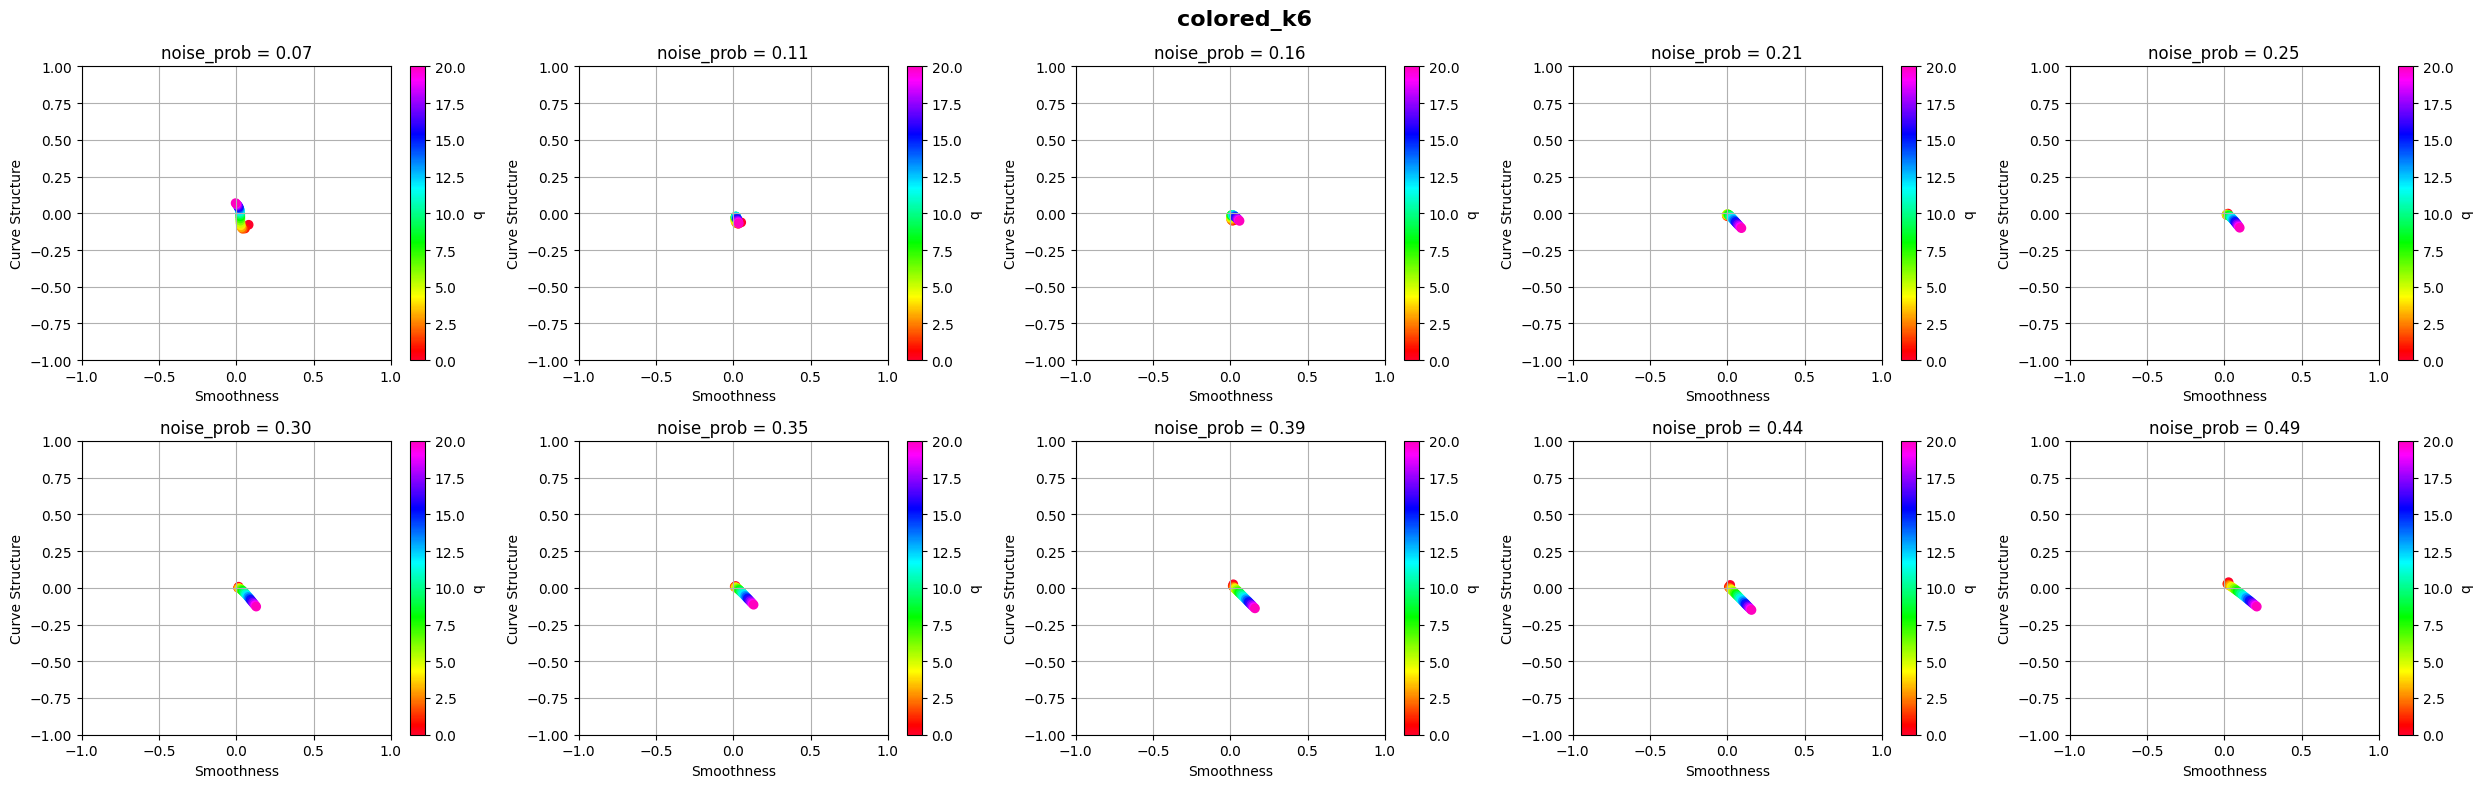

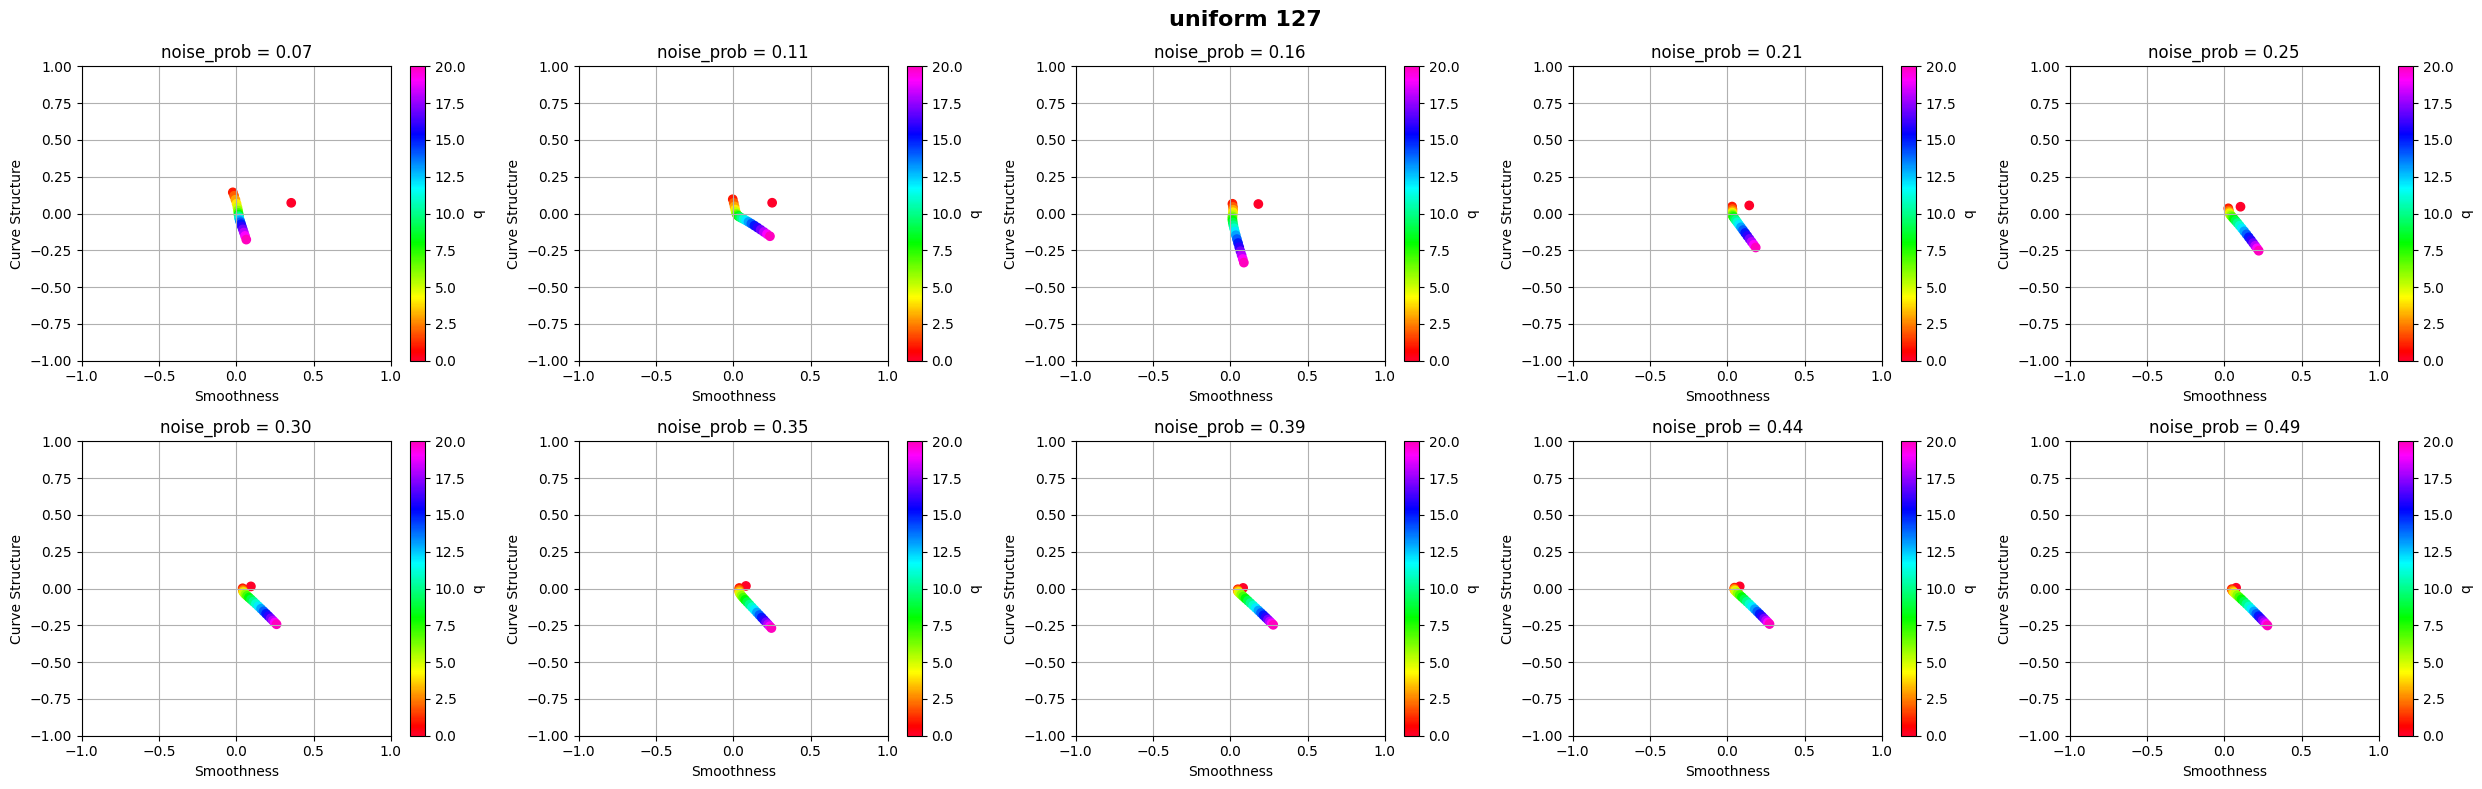

In [21]:
unique_default_images = default_data['image_name'].unique()
unique_noise_probs = default_data['noise_prob'].unique()
# Choose some probs to plot
probs_chosen = unique_noise_probs[1::2]
ncolsChosen = 5
nrowsChosen = int(np.ceil(len(probs_chosen)/ncolsChosen))

for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current imagename
    df_data_filtered = default_data[default_data['image_name'] == imageName]

    fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(25, 4 * nrowsChosen))
    # Flatten the axs array for easier indexing
    axs = axs.flatten()

    for i, noise_prob in enumerate(probs_chosen):
        # Filter DataFrame for the current noise_prob
        df_filtered = df_data_filtered[df_data_filtered['noise_prob'] == noise_prob]

        # Create scatter plot for Smoothness vs. Curve structure, colored by q
        scatter = axs[i].scatter(df_filtered['Smoothness'], df_filtered['Curve structure'], 
                                c=df_filtered['q'], cmap='gist_rainbow')

        # Add colorbar for each subplot
        cbar = fig.colorbar(scatter, ax=axs[i])
        cbar.set_label('q')

        # Set title and labels for the subplot
        axs[i].set_title(f'noise_prob = {truncate(noise_prob, 2)}')
        axs[i].set_xlabel('Smoothness')
        axs[i].set_ylabel('Curve Structure')
        axs[i].set_xlim([-1, 1])
        axs[i].set_ylim([-1, 1])
        axs[i].grid(True)

    plt.suptitle(imageName,fontsize=16, fontweight='bold')
    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Save
    plt.savefig(f'results/noise_analysis/sp/planes/default_{imageName}.png', bbox_inches='tight')
    # # Show the plot
    # plt.show()

Plotting noise characteristic curve

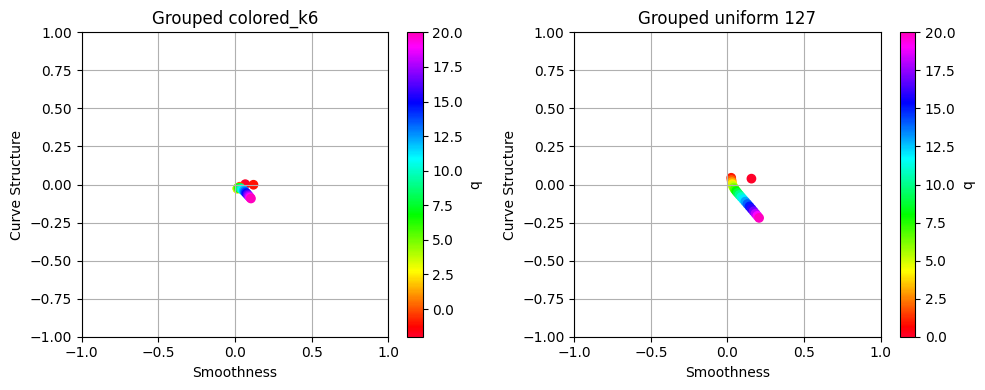

In [27]:
unique_default_images = default_data['image_name'].unique()
ncolsChosen = 2
nrowsChosen = int(np.ceil(len(unique_default_images)/ncolsChosen))
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(10, 4 * nrowsChosen))

for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current imagename
    df_data_filtered = default_data[default_data['image_name'] == imageName]

    grouped_default = df_data_filtered.groupby('q')[['Smoothness', 'Curve structure', 'Weighted Entropy Correct','Weighted Complexity Correct']].mean()
    grouped_default = grouped_default.reset_index()

    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    scatter = axs[i].scatter(grouped_default['Smoothness'], grouped_default['Curve structure'], 
                             c=grouped_default['q'], cmap='gist_rainbow')

    # Add colorbar for each subplot
    cbar = fig.colorbar(scatter, ax=axs[i])
    cbar.set_label('q')

    # Set title and labels for the subplot
    axs[i].set_title(f'Grouped {imageName}')
    axs[i].set_xlabel('Smoothness')
    axs[i].set_ylabel('Curve Structure')
    axs[i].set_xlim([-1, 1])
    axs[i].set_ylim([-1, 1])
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/sp/planes/default_grouped.png', bbox_inches='tight')
# Show the plot
plt.show()

Plotting from images

In [29]:
filenames_dataset = dataset_data.image_name.unique()
print(filenames_dataset)

['canesugar01-r000-s001.png' 'canvas01-r000-s001.png'
 'couscous01-r000-s001.png' 'fabric01-r000-s001.png'
 'fabric02-r000-s001.png' 'fabric03-r000-s001.png'
 'fabric04-r000-s001.png' 'fabric05-r000-s001.png'
 'flaxseed01-r000-s001.png' 'knitwear01-r000-s001.png'
 'knitwear02-r000-s001.png' 'knitwear03-r000-s001.png'
 'lentils01-r000-s001.png' 'oatmeal01-r000-s001.png'
 'pearlsugar01-r000-s001.png' 'rice01-r000-s001.png' 'rug01-r000-s001.png'
 'ryeflakes01-r000-s001.png' 'seeds01-r000-s001.png'
 'seeds02-r000-s001.png' 'sprinkles01-r000-s001.png'
 'tile01-r000-s001.png' 'towel01-r000-s001.png' 'wheat01-r000-s001.png'
 'wool01-r000-s001.png']


In [30]:
chosen_filenames = np.random.choice(filenames_dataset, 10)
chosen_filenames

array(['knitwear01-r000-s001.png', 'sprinkles01-r000-s001.png',
       'rug01-r000-s001.png', 'rice01-r000-s001.png',
       'towel01-r000-s001.png', 'knitwear02-r000-s001.png',
       'canvas01-r000-s001.png', 'fabric01-r000-s001.png',
       'couscous01-r000-s001.png', 'knitwear03-r000-s001.png'],
      dtype=object)

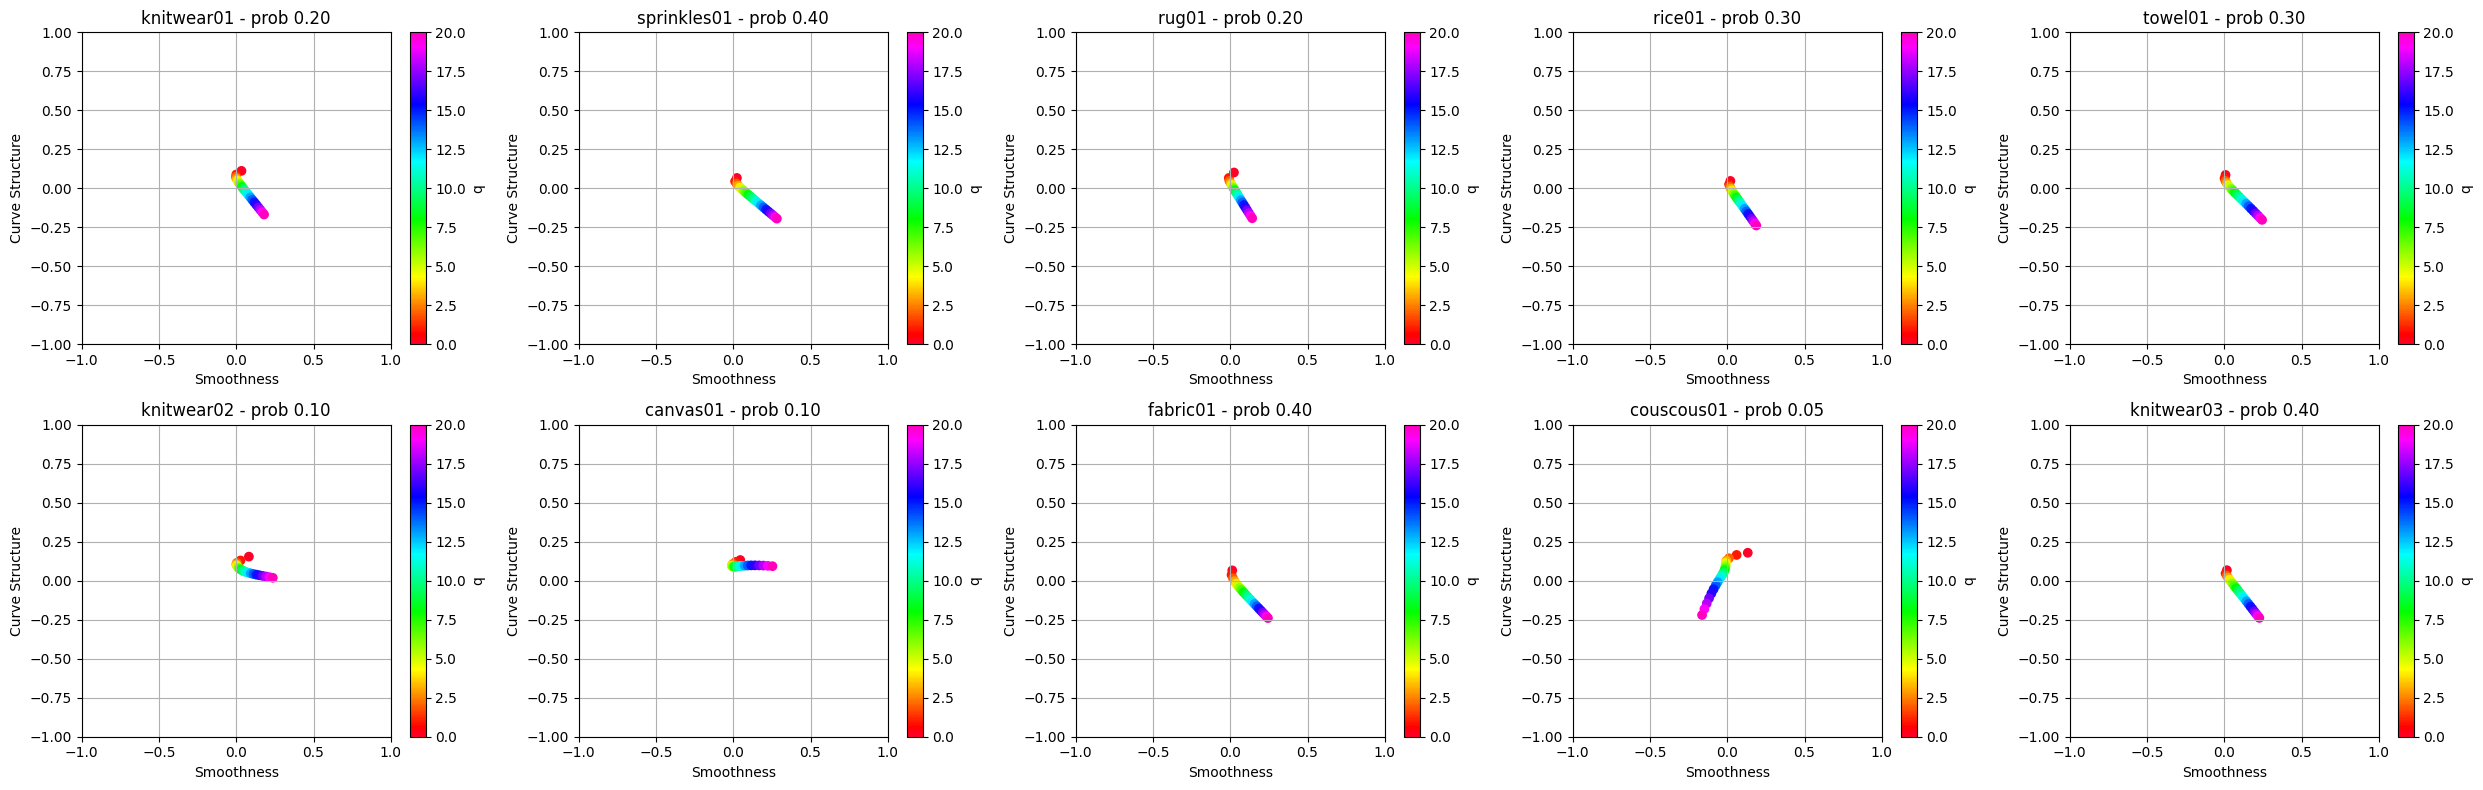

In [35]:
unique_noise_probs = dataset_data['noise_prob'].unique()
ncolsChosen = 5
nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(25, 4 * nrowsChosen))
# Flatten the axs array for easier indexing
axs = axs.flatten()
for i, imageName in enumerate(chosen_filenames):
    # pick a probability curve
    prob_chosen = np.random.choice(unique_noise_probs)

    # Filter DataFrame for the current imageName and probability
    df_filtered = image_data[(image_data['image_name'] == imageName) & (image_data['noise_prob'] == prob_chosen)]


    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    scatter = axs[i].scatter(df_filtered['Smoothness'], df_filtered['Curve structure'], 
                             c=df_filtered['q'], cmap='gist_rainbow')

    # Add colorbar for each subplot
    cbar = fig.colorbar(scatter, ax=axs[i])
    cbar.set_label('q')

    # Set title and labels for the subplot
    axs[i].set_title(f'{imageName.split('-')[0]} - prob {truncate(prob_chosen, 2)}')
    axs[i].set_xlabel('Smoothness')
    axs[i].set_ylabel('Curve Structure')
    axs[i].set_xlim([-1, 1])
    axs[i].set_ylim([-1, 1])
    axs[i].grid(True)
# Turn off any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/sp/planes/sp_dataset_sample.png', bbox_inches='tight')
# Show the plot
plt.show()